In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("student_data_clean.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,0,0,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,0,0,17,0,0,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,0,0,15,0,1,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,0,0,15,0,0,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,0,0,16,0,0,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False


In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')

In [8]:
x=df.drop('G3',axis=1)
y=df['G3']

In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,0,0,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,0,0,17,0,0,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,0,0,15,0,1,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,0,0,15,0,0,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,0,0,16,0,0,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    int64
 1   sex                395 non-null    int64
 2   age                395 non-null    int64
 3   address            395 non-null    int64
 4   famsize            395 non-null    int64
 5   Pstatus            395 non-null    int64
 6   Medu               395 non-null    int64
 7   Fedu               395 non-null    int64
 8   traveltime         395 non-null    int64
 9   studytime          395 non-null    int64
 10  failures           395 non-null    int64
 11  schoolsup          395 non-null    int64
 12  famsup             395 non-null    int64
 13  paid               395 non-null    int64
 14  activities         395 non-null    int64
 15  nursery            395 non-null    int64
 16  higher             395 non-null    int64
 17  internet        

In [10]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [11]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape,X_test.shape

((316, 41), (79, 41))

In [13]:
X_train.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
school,1.000000,-0.014521,0.352029,0.236718,0.007161,0.048850,-0.151126,-0.080678,0.183642,-0.056436,...,-0.051157,-0.080189,-0.023719,0.048028,-0.010640,-0.047113,0.120412,-0.114416,-0.012472,0.040002
sex,-0.014521,1.000000,-0.017898,0.047941,0.062131,-0.004528,0.063613,0.026714,0.066124,-0.333974,...,0.195648,-0.098214,0.060911,0.009403,0.007581,0.088937,0.025568,-0.163679,-0.002526,-0.078899
age,0.352029,-0.017898,1.000000,0.149108,0.011443,0.039682,-0.160849,-0.189821,0.014008,0.032411,...,-0.070070,-0.101279,0.008183,0.046922,-0.076310,0.008651,0.018218,0.007231,-0.123695,0.392058
address,0.236718,0.047941,0.149108,1.000000,-0.061981,-0.000321,-0.139600,-0.089328,0.292964,0.043346,...,-0.057696,-0.052185,0.063829,-0.054366,0.043502,-0.144640,0.025712,0.084881,0.086034,0.002862
famsize,0.007161,0.062131,0.011443,-0.061981,1.000000,-0.136805,-0.019995,-0.045500,0.084271,-0.044275,...,0.070246,0.014169,0.032569,-0.026118,-0.083918,0.017077,-0.025890,0.021681,0.024727,-0.042387
Pstatus,0.048850,-0.004528,0.039682,-0.000321,-0.136805,1.000000,-0.111897,-0.064124,-0.003475,0.006520,...,0.044108,-0.066013,-0.041764,0.105000,0.005331,-0.082957,0.043134,-0.014181,-0.064198,-0.009975
Medu,-0.151126,0.063613,-0.160849,-0.139600,-0.019995,-0.111897,1.000000,0.615004,-0.178514,0.056176,...,0.446563,0.097056,-0.075025,-0.059576,0.230652,0.028749,0.014649,0.107086,0.109501,-0.155565
Fedu,-0.080678,0.026714,-0.189821,-0.089328,-0.045500,-0.064124,0.615004,1.000000,-0.171039,-0.021699,...,0.297552,0.178164,-0.224496,0.018851,0.313504,0.021811,-0.033295,0.018851,-0.045894,-0.133481
traveltime,0.183642,0.066124,0.014008,0.292964,0.084271,-0.003475,-0.178514,-0.171039,1.000000,-0.129264,...,-0.092196,-0.081557,0.096413,-0.018000,0.036245,-0.126570,-0.011777,0.002912,-0.042430,0.055632
studytime,-0.056436,-0.333974,0.032411,0.043346,-0.044275,0.006520,0.056176,-0.021699,-0.129264,1.000000,...,-0.033814,0.107882,-0.056927,0.034968,-0.076037,-0.051369,-0.132156,0.241669,-0.027903,0.063975


<Axes: >

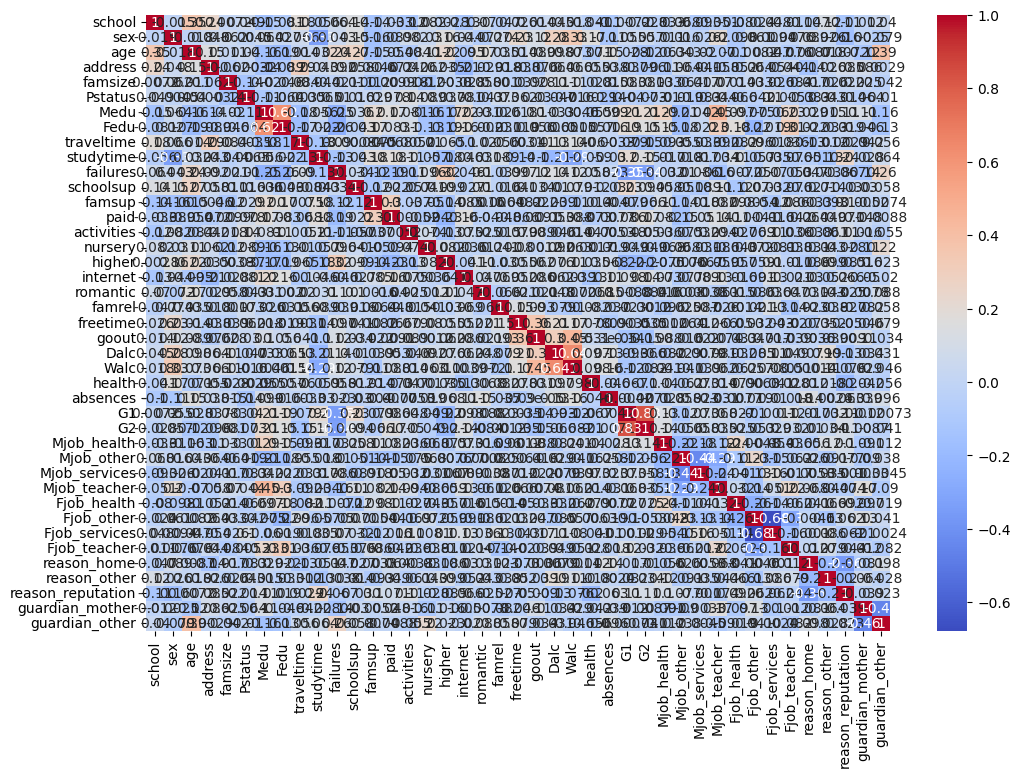

In [14]:
## Check for multicollinearity
plt.figure(figsize=(12,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
## threshold -- Domain expert
corr_features=correlation(X_train, 0.70)

In [27]:
## Drop the correlated features
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((316, 40), (79, 40))

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             316 non-null    int64
 1   sex                316 non-null    int64
 2   age                316 non-null    int64
 3   address            316 non-null    int64
 4   famsize            316 non-null    int64
 5   Pstatus            316 non-null    int64
 6   Medu               316 non-null    int64
 7   Fedu               316 non-null    int64
 8   traveltime         316 non-null    int64
 9   studytime          316 non-null    int64
 10  failures           316 non-null    int64
 11  schoolsup          316 non-null    int64
 12  famsup             316 non-null    int64
 13  paid               316 non-null    int64
 14  activities         316 non-null    int64
 15  nursery            316 non-null    int64
 16  higher             316 non-null    int64
 17  internet           

In [29]:
# 1. Get correlation of all features with the target G3
# (Note: Use your 'df' before the split or 'y_train' joined with 'X_train' for this)
all_corrs = df.corr()['G3'].abs()

# 2. Identify columns where correlation is lower than 0.05
low_impact_cols = all_corrs[all_corrs < 0.05].index.tolist()

# 3. Drop them from your train and test sets
X_train.drop(columns=[c for c in low_impact_cols if c in X_train.columns], inplace=True)
X_test.drop(columns=[c for c in low_impact_cols if c in X_test.columns], inplace=True)

print(f"Dropped {len(low_impact_cols)} low-impact features.")
print(f"Remaining columns: {X_train.shape[1]}")

Dropped 8 low-impact features.
Remaining columns: 32


In [31]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                316 non-null    int64
 1   age                316 non-null    int64
 2   address            316 non-null    int64
 3   famsize            316 non-null    int64
 4   Pstatus            316 non-null    int64
 5   Medu               316 non-null    int64
 6   Fedu               316 non-null    int64
 7   traveltime         316 non-null    int64
 8   studytime          316 non-null    int64
 9   failures           316 non-null    int64
 10  schoolsup          316 non-null    int64
 11  paid               316 non-null    int64
 12  nursery            316 non-null    int64
 13  higher             316 non-null    int64
 14  internet           316 non-null    int64
 15  romantic           316 non-null    int64
 16  famrel             316 non-null    int64
 17  goout              

In [33]:
# 1. Calculate correlation with G3
# We use the training data to avoid leakage
correlations = X_train.corrwith(Y_train).abs().sort_values(ascending=False)

# 2. Select the names of the top 15
top_15_features = correlations.head(15).index.tolist()

# 3. Filter your data
X_train_top = X_train[top_15_features]
X_test_top = X_test[top_15_features]

print("Top 15 Features selected by Correlation:")
print(top_15_features)

Top 15 Features selected by Correlation:
['G1', 'failures', 'Medu', 'higher', 'paid', 'age', 'studytime', 'Fedu', 'romantic', 'internet', 'Mjob_health', 'traveltime', 'goout', 'reason_reputation', 'Pstatus']
